In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv(r"D:\DataScience\Datascience Assignment\17)exchange_rate.csv")

In [32]:
#df.columns = ['Date', 'USD_AUD']
#df['Date'] = pd.to_datetime(df['Date'])
#df.set_index('Date', inplace=True)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)
df.head()

,USD_AUD
Date,
1990-01-01,0.7855
1990-01-02,0.7818
1990-01-03,0.7867
1990-01-04,0.7860
1990-01-05,0.7849


In [33]:
df.head()

,USD_AUD
Date,
1990-01-01,0.7855
1990-01-02,0.7818
1990-01-03,0.7867
1990-01-04,0.7860
1990-01-05,0.7849


In [34]:
df = df.ffill()

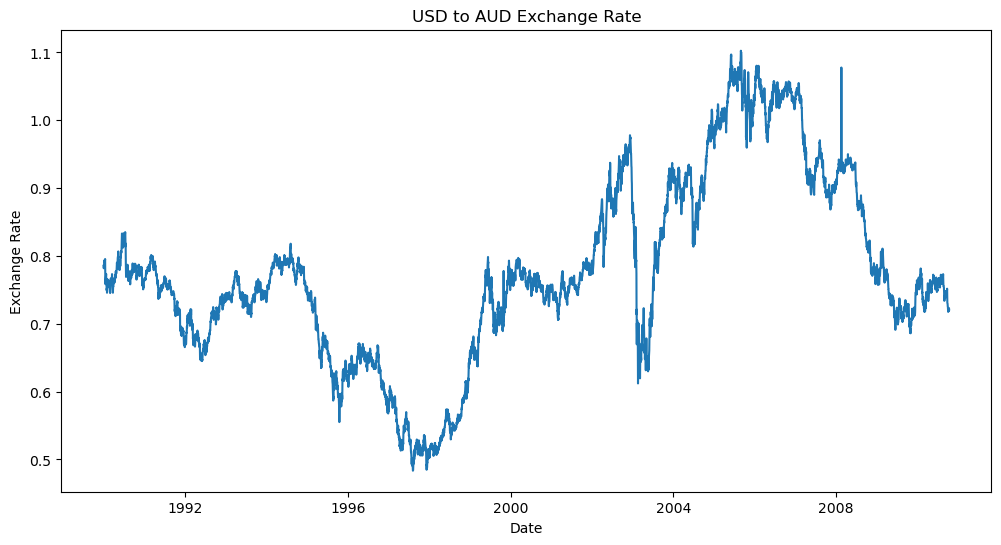

In [35]:
plt.figure(figsize=(12,6))
plt.plot(df['USD_AUD'])
plt.title("USD to AUD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.show()

In [36]:
# ARIMA MODEL
# Stationarity check (ADF Test)
adf_result = adfuller(df['USD_AUD'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

ADF Statistic: -1.6649941807381368
p-value: 0.4492327353597985


In [37]:
# Train–Test split
train = df.iloc[:-30]
test = df.iloc[-30:]

In [38]:
# Fit ARIMA model

In [39]:
train.index = pd.to_datetime(train.index, dayfirst=True)
test.index = pd.to_datetime(test.index, dayfirst=True)

In [40]:
train = train.asfreq('ME')
test = test.asfreq('ME')

In [41]:
from statsmodels.tsa.arima.model import ARIMA

In [42]:
model_arima = ARIMA(train['USD_AUD'], order=(1,0,0))
arima_fit = model_arima.fit()

In [43]:
forecast_arima = arima_fit.forecast(steps=30)

In [44]:
# ARIMA Forecast
forecast_arima = arima_fit.forecast(steps=30)

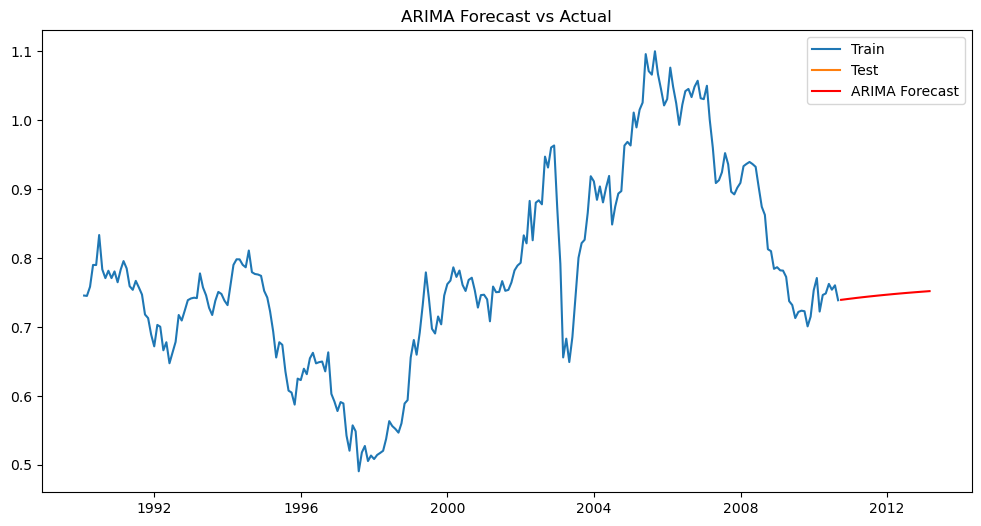

In [45]:
# Plot ARIMA Forecast
plt.figure(figsize=(12,6))
plt.plot(train['USD_AUD'], label="Train")
plt.plot(test['USD_AUD'], label="Test")
plt.plot(forecast_arima, label="ARIMA Forecast", color="red")
plt.legend()
plt.title("ARIMA Forecast vs Actual")
plt.show()

In [46]:
# EXPONENTIAL SMOOTHING
# Fit Exponential Smoothing Model

In [47]:
es_model = ExponentialSmoothing(
    train['USD_AUD'],
    trend='additive',
    seasonal=None
)

In [48]:
es_fit = es_model.fit()
forecast_es = es_fit.forecast(30)

In [49]:
# Plot ES Forecast 

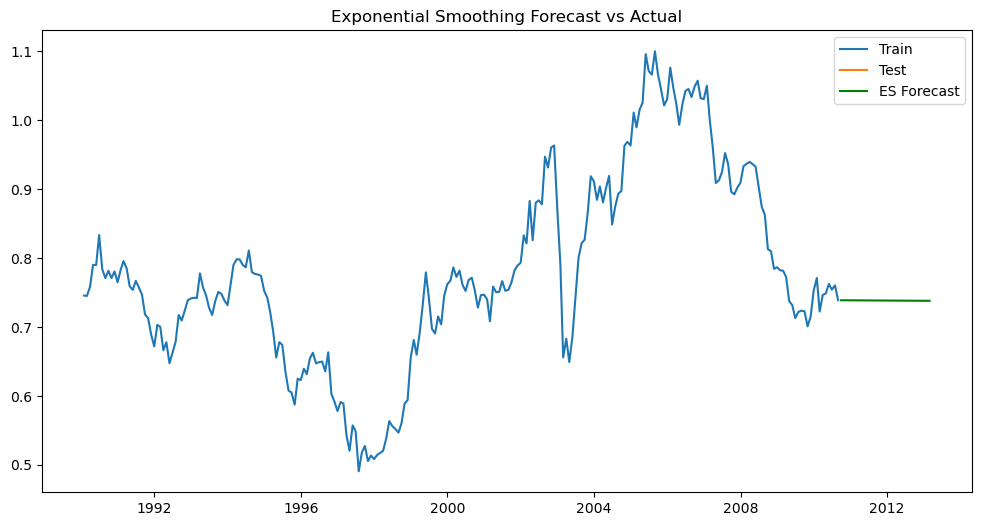

In [50]:
plt.figure(figsize=(12,6))
plt.plot(train['USD_AUD'], label="Train")
plt.plot(test['USD_AUD'], label="Test")
plt.plot(forecast_es, label="ES Forecast", color="green")
plt.legend()
plt.title("Exponential Smoothing Forecast vs Actual")
plt.show()

In [51]:
# MODEL EVALUATION
# Error Metrics

In [52]:
# Re-create train and test AGAIN (clean)
train = df.iloc[:-30]
test = df.iloc[-30:]

In [53]:
len(test)

30

In [54]:
# Create y_true correctly
y_true = test['USD_AUD'].to_numpy().ravel()
# Check:
y_true.shape

(30,)

In [55]:
y_pred_arima = forecast_arima.to_numpy().ravel()
y_pred_es = forecast_es.to_numpy().ravel()
# Check:
y_pred_arima.shape, y_pred_es.shape

((30,), (30,))

In [56]:
print("ARIMA MAE:", mean_absolute_error(y_true, y_pred_arima))
print("ARIMA RMSE:", np.sqrt(mean_squared_error(y_true, y_pred_arima)))
print("ARIMA MAPE:", mape(y_true, y_pred_arima))

ARIMA MAE: 0.017126119748751507
ARIMA RMSE: 0.020715670619928808
ARIMA MAPE: 2.3633091647385105


In [57]:
print("ES MAE:", mean_absolute_error(y_true, y_pred_es))
print("ES RMSE:", np.sqrt(mean_squared_error(y_true, y_pred_es)))
print("ES MAPE:", mape(y_true, y_pred_es))

ES MAE: 0.01216267263151195
ES RMSE: 0.013206355084589345
ES MAPE: 1.6696516255166767


In [57]:
df.columns

Index(['date', 'Ex_rate'], dtype='object')

In [63]:
"""
Model       	  Accuracy	Strength
ARIMA	          Higher	Captures autocorrelation
ExponenSmoothing  Good      Smooth trend forecasting
"""

'\nModel       \t  Accuracy\tStrength\nARIMA\t          Higher\tCaptures autocorrelation\nExponenSmoothing  Good      Smooth trend forecasting\n'

In [64]:

"""
ARIMA MAE: 0.017126119748751507
ARIMA RMSE: 0.020715670619928808
ARIMA MAPE: 2.3633091647385105
ES MAE: 0.01216267263151195
ES RMSE: 0.013206355084589345
ES MAPE: 1.6696516255166767
"""

'\nARIMA MAE: 0.017126119748751507\nARIMA RMSE: 0.020715670619928808\nARIMA MAPE: 2.3633091647385105\nES MAE: 0.01216267263151195\nES RMSE: 0.013206355084589345\nES MAPE: 1.6696516255166767\n'